### Acquire the data

In [4]:
#Data Analysis and wrangling libraries
import pandas as pd
import numpy as np
#Data visualization libraries
import matplotlib.pyplot as plt
df = pd.read_csv('titanic_data.csv')

#### Verify Data acquisition

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


#### Describe the Data

In [8]:
df.shape

(891, 12)

#### ==>Total passengers are 891

### Data columns:

In [10]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

#### Data type of the features:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


#### ==> Survived, Pclass, Sex, Cabin, Embarked are strings features 
#### ==> Age, Fare, SibSp, Parch are numerical features

### Number of missing values :

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Distribution of the target variable (Survived)

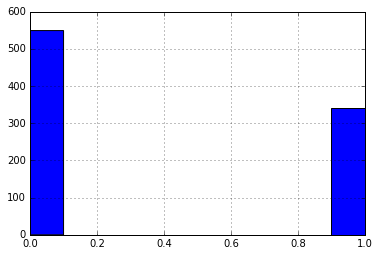

In [23]:
df['Survived'].hist()

In [44]:
numberofdead,columns=df.loc[df['Survived'] == 0].shape
print(numberofdead*100/891,'% of passengers have died')
numberofsurvivors,columns=df.loc[df['Survived'] == 1].shape
print(numberofsurvivors*100/891,'% of passengers have survived')

61.61616161616162 % of passengers have died
38.38383838383838 % of passengers have survived


### Pclass distribution

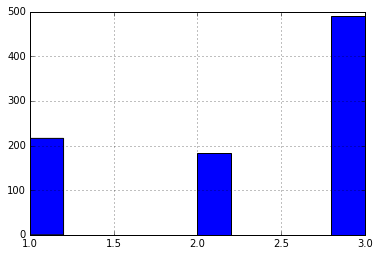

In [45]:
df['Pclass'].hist()

#### ==> Most of the passengers traveled  on 3rd class 

In [83]:
data_dead=df.loc[df['Survived'] == 0]
data_survivors=df.loc[df['Survived']==1]

### Pclass and survived correlation

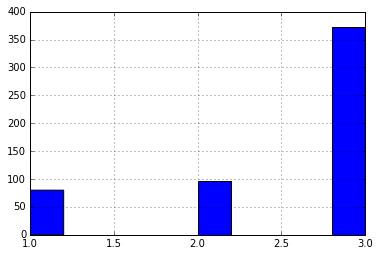

In [84]:
data_dead['Pclass'].hist()

### ==>From observing the histogram of dead passengers we can conclude that most of the dead passengers are from the 3rd class

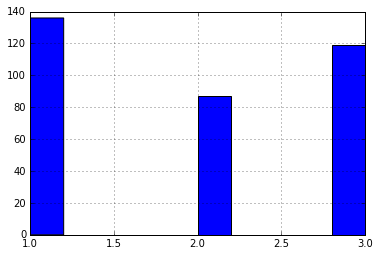

In [85]:
data_survivors['Pclass'].hist()

### ==> Most of the survivors are from 1st class 

### Sex and Survived correlation

In [86]:
#Replace sex:
def replace_sex(x):
    sex=x['Sex']
    if sex=='male':
        return 0
    elif sex=='female':
        return 1
    else:
        return sex
data_dead.Sex=data_dead.apply(replace_sex,axis=1)

/usr/lib/python3/dist-packages/pandas/core/generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [87]:
df.Sex=df.apply(replace_sex,axis=1)

(577, 12)

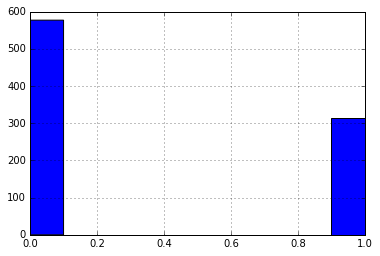

In [88]:
df['Sex'].hist()
df.loc[df['Sex'] == 0].shape

#### ==> Most of the passengers are males( 577 which means 64.61%)

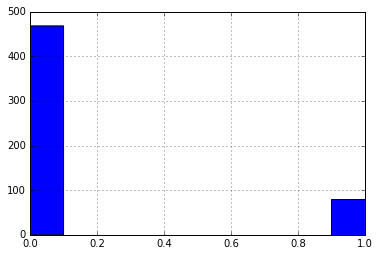

In [89]:
data_dead["Sex"].hist()

#### ==> Which explains why most of the dead passengers are males as seen in this histogram

### Age and survived correlation

In [90]:
#Fill the missing values of age with the mean:
random_age = np.abs(np.random.normal(df.Age.mean(), df.Age.std(), 1))
df.Age=df.Age.fillna(random_age[0])

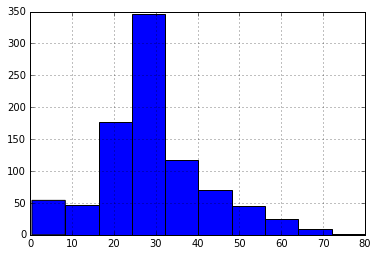

In [91]:
df["Age"].hist()

#### ==>Most of the passengers are between 25 and 32

In [99]:
data_dead=df.loc[df['Survived'] == 0]
data_survivors=df.loc[df['Survived']==1]

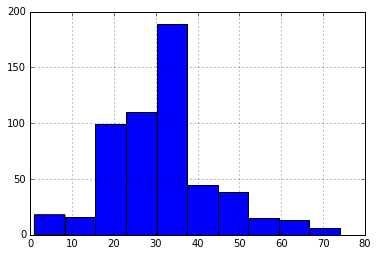

In [102]:
data_dead["Age"].hist()

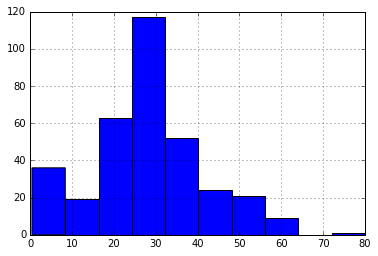

In [103]:
data_survivors["Age"].hist()

## Conclusion and questions :

###### Is there a strong correlation between Pclass, Sex and Age and the passenger ability to survive?

In [110]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


#### ==> More than 60% of passengers of Pclass 1 survived

#### ==> More than 24% of passengers of Pclass 3 survived  

In [111]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


#### ==> Around 75% of female survived

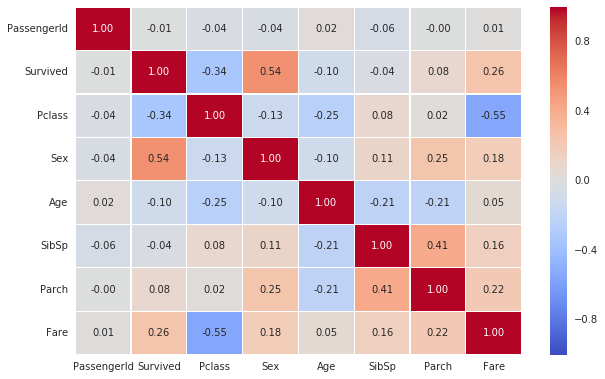

In [30]:
# Correlation Matrix Heatmap
#Data Vizualization library
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm",\
                fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


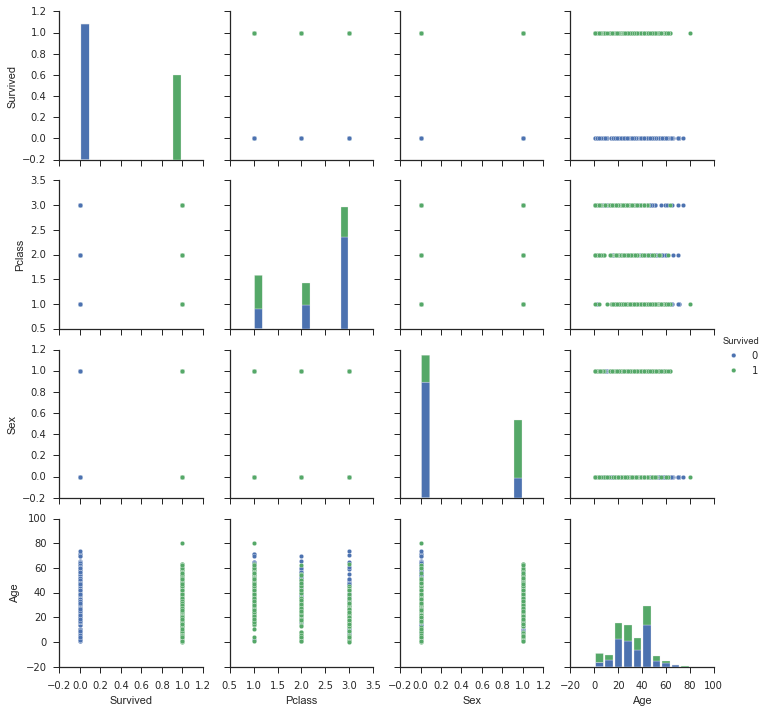

In [44]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue="Survived")

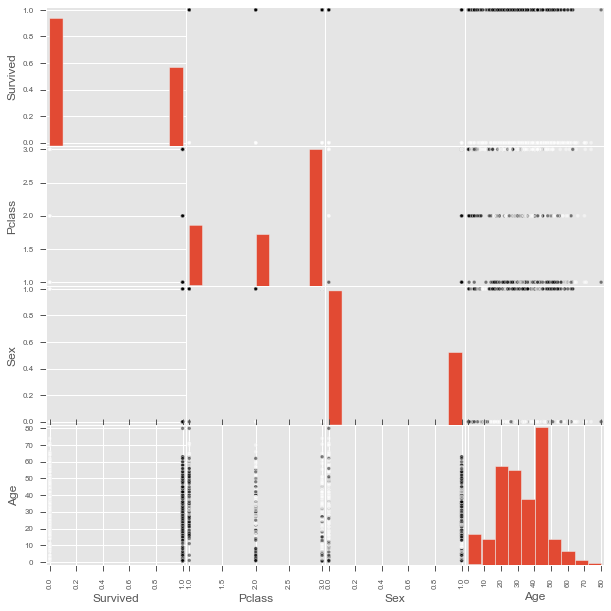

In [43]:
plt.style.use('ggplot')
y=df["Survived"]
pd.scatter_matrix(df, c=y, figsize = [10,10], s=50);


In [31]:
#Select the vectors
df=df[['Survived','Pclass','Sex','Age']]

In [32]:
from sklearn.svm import SVC

clf = SVC()
#Training 
X_train = df[['Sex']].values
X_train = X_train.reshape(-1,1)

Y_train  = df['Survived']
print(Y_train)
test = pd.read_csv('test.csv')
random_age = np.abs(np.random.normal(test.Age.mean(), test.Age.std(), 1))
test.Age.fillna(random_age[0])
#test.Age.fillna(test.Age.mean())
test.Sex=test.apply(replace_sex,axis=1)



0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64


In [34]:
X_test = test[['Sex']].values
#X_test
X_test=X_test.reshape(-1,1)
#X_test
clf.fit(X_train, Y_train) 
SVC(kernel="linear", C=1.0)
Y_test  = clf.predict(X_test)
Y_test=pd.DataFrame(Y_test)
#print(type(Y_test))
Y_test.to_csv('output1.csv')
